# Proyecto
### José Carlos Obregón Castañeda - IDE9610014

### 1. Crear un entorno de anaconda con los paquetes que considere necesarios.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validación y pruebas(20%).

In [3]:
datos = np.load("proyecto_training_data.npy")
df = pd.DataFrame(datos)

df.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'] 

df_ent = df[:int(len(df)*0.8)] 
df_prs = df[int(len(df)*0.8):]

print("Datos de entrenamiento: ", len(df_ent))
print("Datos de prueba: ", len(df_prs))

Datos de entrenamiento:  1168
Datos de prueba:  292


### 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular (usando numpy o pandas):
- media
- valor máximo
- valor mínimo
- rango (peak to peak)
- desviación estándar

In [ ]:
columnas = df.columns
    
for col in columnas:
    
    # obtiene la descripción de la columna
    print(col)
    print("-----------------------------")
    # imprime los valores solicitados.
    print("Media: ", np.mean(df[col]))
    print("Máximo: ", np.max(df[col]))
    print("Mínimo: ", np.max(df[col]))
    print("Rango PtP: ", np.ptp(df[col]))
    print("Desviación: ", np.std(df[col]))
    print("=============================")
    print()
    

### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable; función displot (https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [ ]:
columnas = df.columns
    
for col in columnas:
    
    # se cambia a función displot a hisplot debido al mensaje de seaborn:
    #    `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
    #    Please adapt your code to use either `displot` (a figure-level function with
    #    similar flexibility) or `histplot` (an axes-level function for histograms).
    # para intentar con displot de todas formas, descomentariar la siguiente línea:
    
    #sns.distplot(df[col])

    sns.histplot(df[col])
    plt.show()
    print("=======================================================================================")
    print()
    

### 5. Para cada variable independiente x :
- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlacón y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.

In [69]:
# Calcular el coeficiente de correlación entre x y y

correlacion = df.corr()['SalePrice']
print(correlacion)

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
LotFrontage     0.351799
Name: SalePrice, dtype: float64


In [ ]:
# Graficar x vs y(scatterplot) usando matplotlib
# Colocar el coeficiente de correlacón y colocarlo como parte del título de la gráfica.

columnas = df.columns

for col in columnas:
    if col != 'SalePrice':
        
        graf = pd.DataFrame(df, columns=['SalePrice'])
        graf.columns = ['y']
        graf['x']=df[col]
        corr = correlacion[col]
        
        print('--------------------------------------------------------------------------------')
        print(col)
        print('--------------------------------------------------------------------------------')
        plt.scatter(graf['x'], graf['y'], c ="skyblue")
        plt.title(f'R = {corr}')
        plt.show()
        print('================================================================================')
        

In [14]:
# Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
# con más potencial predictivo es decir las 2 variables que presentan mayor correlación
# entre dicha variable y la variable dependiente

print('Las dos variables con mayor correlación son:')
print('OverallQual: ',correlacion.iloc[1])
print('1stFlrSF: ',correlacion.iloc[2])


Las dos variables con mayor correlación son:
OverallQual:  0.7909816005838053
1stFlrSF:  0.6058521846919153


# 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0+β1∗x. 
La función recibe como argumentos: 
- Vector con la variable independiente x
- Vector con la variable dependiente y
- Un entero epochs que indica por cuantas iteraciones entrenar el modelo
- Un entero "imprimir_error_cada", que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10, 20, 30, 40, 50.
- Escalar α (learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [120]:
# Creación de clase para cálculo de regresión lineal
class regresion_lineal(object):
    
    def __init__(self, b0 = 1, b1 = 1):
        # Setea por default las variables iniciales
        self.b0 = b0
        self.b1 = b1
        
    # Calcula los vectores b0 y b1 
    def fit(self,x,y):
        # Genera la matriz de cálculo
        matriz = y
        matriz.columns = ['y']
        matriz['x'] = x_ent
        matriz['x2'] = x_ent**2
        matriz['xy'] = matriz['x']*matriz['y'] 
        
        # Obtiene variables finales
        n = len(matriz)
        Ex2 = sum(matriz['x2'])
        Exy = sum(matriz['xy'])
        Mx = matriz['x'].mean()
        My = matriz['y'].mean()
        
        # Realiza cálculo de coeficientes
        b = (Exy-(n*Mx*My))/(Ex2-(n*(Mx**2)))
        a = My-(b*Mx)
        self.b0 = a
        self.b1 = b
        
        # Retorna la información
        return self.b0, self.b1

    # Realiza la predicción y = β0+β1∗x. 
    def predict(self, x):
        y = np.empty_like(x)

        for index, value in x.iterrows():
            y[index] = self.b0 + self.b1 * value

        # Retorna la información
        return y

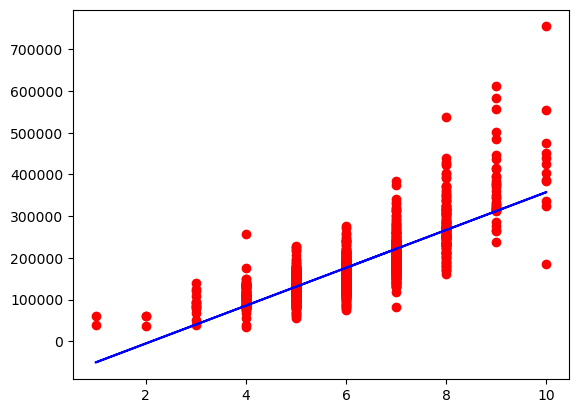

In [119]:
# Obtiene las columnas para realizar la regresión lineal
x_ent = pd.DataFrame(df_ent, columns=['OverallQual'])
y_ent = pd.DataFrame(df_ent, columns=['SalePrice'])
y_graf = pd.DataFrame(df_ent, columns=['SalePrice'])

# Calcular la regresión lineal
regresion = regresion_lineal()
coeficiente = regresion.fit(x_ent,y_ent)
y_predict = regresion.predict(x_ent)

# Utiliza los datos para graficar
xgraf = x_ent.to_numpy()
ygraf = y_graf.to_numpy()

# Gráfica de regresión
plt.scatter(xgraf, ygraf, color = "red") 
plt.plot(xgraf, y_predict, color = "blue")
plt.show()
